# Tarea 6
## Temas Selectos de Estadística
### Diego Ramírez Araque

## Ejercicio 1

Sea $f_Z = f_X * f_X$ la convolusión de $f_X$ consigo misma en donde $f_X = \frac{1}{\sqrt{2 \pi}} e^{-\frac{x^{2}}{2}}$.  Calculamos $f_Z$:

\begin{align}
(f*f)(z) &= \int_{-\infty}^{\infty} f(z-x)f(x)dx \\
&=  \int_{-\infty}^{\infty}  \frac{1}{\sqrt{2 \pi}} e^{-\frac{(z-x)^{2}}{2}} \frac{1}{\sqrt{2 \pi}} e^{-\frac{x^{2}}{2}} dx \\
&= \frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{-\frac{z^2 -2xz+2x^2}{2}} dx\\
&= \frac{1}{2 \pi} e^{-\frac{z^{2}}{2}} \int_{-\infty}^{\infty} e^{-(-xz+x^2)}dx \\ 
&=  \frac{1}{2 \pi} e^{-\frac{z^{2}}{2}} e^{\frac{z^{2}}{4}} \int_{-\infty}^{\infty}   e^{-\frac{z^{2}}{4}} e^{-(-xz+x^2)}dx \\
&=  \frac{1}{2 \pi} e^{-\frac{z^{2}}{2}} e^{\frac{z^{2}}{4}} \int_{-\infty}^{\infty}    e^{-(\frac{z^{2}}{4}-xz+x^2)}dx \\
&= \frac{1}{2 \pi} e^{-\frac{z^{2}}{2}} e^{\frac{z^{2}}{4}} \int_{-\infty}^{\infty} e^{(x-\frac{z}{2})^{2}}dx 
\end{align}

Realizando el cambio de variable $u = x-\frac{z}{2}$ entonces tenemos que:

\begin{align}
(f*f)(z) &= \frac{1}{2 \pi} e^{-\frac{z^{2}}{2}} e^{\frac{z^{2}}{4}}  \int_{-\infty}^{\infty} e^{u^2}dx \\
&= \frac{1}{2 \pi} e^{-\frac{z^{2}}{4}}  \int_{-\infty}^{\infty} e^{u^2}dx \\
&= \frac{1}{2 \pi} e^{-\frac{z^{2}}{4}}  \sqrt{\pi} \\
&= \frac{1}{2 \sqrt{\pi}} e^{-\frac{z^{2}}{4}} .
\end{align}
Por lo tanto:
\begin{align}
f_Z &= \frac{1}{2 \sqrt{\pi}} e^{-\frac{z^{2}}{4}} .
\end{align}

## Ejercicio 2

Si $\gamma=1$ entonces la $pdf$ de la distribución Cauchy está dada por:
$$
f(x) = \frac{1}{\pi(1+x^{2})}
$$
Para así obtener que la $cdf$ es:
$$
F(x) = \frac{1}{\pi} \arctan\bigg(\frac{x}{\gamma}\bigg)+\frac{1}{2}
$$
con  inversa
$$
F^{-1}(u) = \gamma \tan(\pi(u-1/2))
$$

Para así obtener que $X = F^{-1}(U) \sim Cauchy$ con $U \sim Uniforme(0,1)$

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

* Implementación:

In [19]:
## Simulación Cauchy

def cauchy(gama,n):
  u = np.random.uniform(0,1,n)
  Fu = gama*np.tan(np.pi*(u-1/2))
  return Fu

In [20]:
cauchy(1,10)

array([ 0.63263426, -1.68139685, -6.84137233,  1.36035465, -1.17816205,
       -0.59165364,  0.18939525,  0.67118608,  2.33032707, -0.0337923 ])

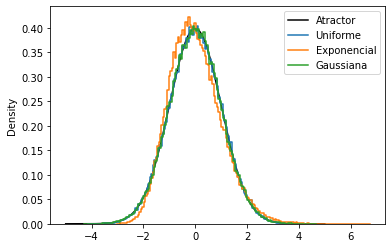

In [21]:
#Definicion distribucion gaussiana analítica
def gaussian(x,mu,sigma):
    dist = np.zeros([len(x)])
    for i in range(len(x)):
        dist[i] = 1./np.sqrt(2*math.pi*sigma**2)*math.e**(-(x[i]-mu)**2/(2*sigma**2))
    return dist
points = 100000   
t = np.linspace(-5,5,points) 
plt.plot(t,gaussian(t,0,1),'-k',label='Atractor')

#Paramétro: suma de distribuciones
iteration = 20


# a) uniforme
a = 1
x = np.zeros([points])
for i in range(points):
    for k in range(iteration):
        x[i] += np.random.uniform(-a,a) 
        
sns.histplot(data=(x-np.mean(x))/np.std(x),stat="density", element="step", fill=False,kde=False,label='Uniforme')        


# b) exponencial
lam = 1
x = np.zeros([points])
for i in range(points):
    for k in range(iteration):
        x[i] += np.random.exponential(1./lam) 
sns.histplot(data=(x-np.mean(x))/np.std(x),stat="density", element="step", fill=False,kde=False,label='Exponencial')        


# c) normal
mu = 0
sigma = 1
x = np.zeros([points])
for i in range(points):
    for k in range(iteration):
        x[i] += np.random.normal(mu,sigma) 
sns.histplot(data=(x-np.mean(x))/np.std(x),stat="density", element="step", fill=False,kde=False,label='Gaussiana')


plt.legend()
plt.show()

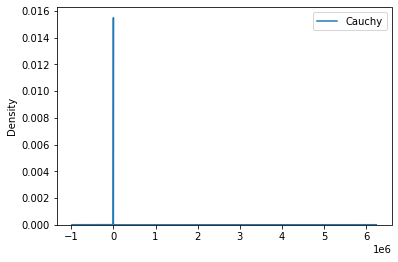

In [22]:
# d) Cauchy
#mu = 0
#sigma = 1
for i in range(points):
    for k in range(iteration):
        x[i] += float(cauchy(1,1)) 
sns.histplot(data=x,stat="density", element="step", fill=False,kde=False,label='Cauchy')

plt.legend()
plt.show()

In [23]:
x

array([  34.77036102,  -11.68675372,   11.16529017, ..., -247.37579696,
         11.05863661,   23.0273656 ])

Por lo tante la distribución converge a una solución degenerada.

## Ejercicio 3

Supongamos que:

\begin{align}
\phi((A-\phi(A))(B-\phi(B)(A-\phi(A))) = 0
\end{align}
Desarrollando el lado izquierdo de la igualdad anterior obtenemos que:
\begin{align}
\implies& \quad \phi((A-\phi(A))[BA-B\phi(A)-\phi(B)A+\phi(B)\phi(A)]) = 0 \\
\iff& \quad \phi(ABA -AB\phi(A)-A\phi(B)A +A\phi(B)\phi(A) -\phi(A)BA +\phi(A)B\phi(A)+\phi(A)\phi(B)A-\phi(A)\phi(B)\phi(A)) = 0 \\
\implies& \phi(ABA) - \phi(AB) \phi(A)  - \phi(A)\phi(B)\phi(A) + \phi(A)\phi(B)\phi(A) - \phi(A)\phi(BA) + \phi(A)\phi(B)\phi(A) + \phi(A)\phi(B)\phi(A)-\phi(A)\phi(B)\phi(A) = 0 \\
\implies& \phi(ABA) - \phi(AB) \phi(A)  - \phi(A)\phi(BA) + \phi(A)\phi(B)\phi(A) = 0 \\
\implies& \phi(ABA) - \phi(AB) \phi(A)  - \phi(A)\phi(B)\phi(A) + \phi(A)\phi(B)\phi(A) = 0 \\
\implies& \phi(ABA) - \phi(AB) \phi(A)  = 0 \\
\implies& \phi(ABA)   = \phi(AB) \phi(A) \\
\implies& \phi(ABA)  = \phi(A)\phi(B)\phi(A) \\
\implies& \phi(ABA)  = \phi(A)\phi(A)\phi(B) \\
\implies& \phi(ABA)  = \phi(A^{2}) \phi(B) \\
\implies& \phi(ABA)  = \phi(A^{2}B) \\
\end{align}


## Ejercicio 4

Se utiliza sympy para las soluciones numéricas de las ecuaciones simbólicas.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import seaborn as sns

In [25]:
m = 1000
p = 100
n = 200
E_r1 = []
r = 0.2
## Monte CARLO
for i in range(m):
  ### GOE
  H = np.random.normal(size=(p, p))
  H = (H+np.transpose(H))/2
  ### WISHART
  X = np.random.normal(size=(p, n))
  W = np.matmul(X,np.transpose(X))
  ### GOE + WISHART ESCALAMIENTO
  H = r*H/np.sqrt(p) + (1-r)*W/n
  eig = list(LA.eigh(H)[0])
  E_r1 = E_r1 + eig

#### r2

m = 1000
p = 100
n = 200
E_r2 = []
r = 0.4
## Monte CARLO
for i in range(m):
  ### GOE
  H = np.random.normal(size=(p, p))
  H = (H+np.transpose(H))/2
  ### WISHART
  X = np.random.normal(size=(p, n))
  W = np.matmul(X,np.transpose(X))
  ### GOE + WISHART ESCALAMIENTO
  H = r*H/np.sqrt(p) + (1-r)*W/n
  eig = list(LA.eigh(H)[0])
  E_r2 = E_r2 + eig

#### r3

m = 1000
p = 100
n = 200
E_r3 = []
r = 0.6
## Monte CARLO
for i in range(m):
  ### GOE
  H = np.random.normal(size=(p, p))
  H = (H+np.transpose(H))/2
  ### WISHART
  X = np.random.normal(size=(p, n))
  W = np.matmul(X,np.transpose(X))
  ### GOE + WISHART ESCALAMIENTO
  H = r*H/np.sqrt(p) + (1-r)*W/n
  eig = list(LA.eigh(H)[0])
  E_r3 = E_r3 + eig

#### r4

m = 1000
p = 100
n = 200
E_r4 = []
r = 0.8
## Monte CARLO
for i in range(m):
  ### GOE
  H = np.random.normal(size=(p, p))
  H = (H+np.transpose(H))/2
  ### WISHART
  X = np.random.normal(size=(p, n))
  W = np.matmul(X,np.transpose(X))
  ### GOE + WISHART ESCALAMIENTO
  H = r*H/np.sqrt(p) + (1-r)*W/n
  eig = list(LA.eigh(H)[0])
  E_r4 = E_r4 + eig

In [29]:
from sympy import *
from sympy.solvers import solve
from sympy import re, im, E, I

#### R1
## DOMINIO
E = E_r1 + E_r2 + E_r3 + E_r4
Z = list(np.linspace(min(E),max(E),100))
## CONSTANTES
q = p/n
w = 0.2
sols = []
## SOLVER
for z in Z:
  G = symbols('G')
  sol = solve(w**2*G/2 + (1-w)/(1-q*(1-w)*G)+1/G-z,G)
  sols.append(sol)
## EXTRACCIÓN SOLUCIONES
fx1 = []
for i in range(len(sols)):
  for k in range(len(sols[i])):
    complex_test = sols[i][k].is_real
    if complex_test == False:
          fx1.append(float(im(sols[i][k])))
          break
fx1 = [abs(fx1[i])/np.pi for i in range(len(fx1))]

#### R2
## CONSTANTES
w = 0.4
sols = []
## SOLVER
for z in Z:
  G = symbols('G')
  sol = solve(w**2*G/2 + (1-w)/(1-q*(1-w)*G)+1/G-z,G)
  sols.append(sol)
## EXTRACCIÓN SOLUCIONES
fx2 = []
for i in range(len(sols)):
  for k in range(len(sols[i])):
    complex_test = sols[i][k].is_real
    if complex_test == False:
          fx2.append(float(im(sols[i][k])))
          break
fx2 = [abs(fx2[i])/np.pi for i in range(len(fx2))]

#### R3
## CONSTANTES
w = 0.6
sols = []
## SOLVER
for z in Z:
  G = symbols('G')
  sol = solve(w**2*G/2 + (1-w)/(1-q*(1-w)*G)+1/G-z,G)
  sols.append(sol)
## EXTRACCIÓN SOLUCIONES
fx3 = []
for i in range(len(sols)):
  for k in range(len(sols[i])):
    complex_test = sols[i][k].is_real
    if complex_test == False:
          fx3.append(float(im(sols[i][k])))
          break
fx3 = [abs(fx3[i])/np.pi for i in range(len(fx3))]

#### R4
## CONSTANTES
w = 0.8
sols = []
## SOLVER
for z in Z:
  G = symbols('G')
  sol = solve(w**2*G/2 + (1-w)/(1-q*(1-w)*G)+1/G-z,G)
  sols.append(sol)
## EXTRACCIÓN SOLUCIONES
fx4 = []
for i in range(len(sols)):
  for k in range(len(sols[i])):
    complex_test = sols[i][k].is_real
    if complex_test == False:
          fx4.append(float(im(sols[i][k])))
          break
fx4 = [abs(fx4[i])/np.pi for i in range(len(fx4))]

In [33]:
#### SEMI CÍRCULO
## CONSTANTES
w = 0
sols = []
## SOLVER
for z in Z:
  G = symbols('G')
  sol = solve(w**2*G/2 + (1-w)/(1-q*(1-w)*G)+1/G-z,G)
  sols.append(sol)
## EXTRACCIÓN SOLUCIONES
fx5 = []
for i in range(len(sols)):
  for k in range(len(sols[i])):
    complex_test = sols[i][k].is_real
    if complex_test == False:
          fx5.append(float(im(sols[i][k])))
          break
fx5 = [abs(fx5[i])/np.pi for i in range(len(fx5))]

#### Marcenko Pastur
## CONSTANTES
w = 1
sols = []
## SOLVER
for z in Z:
  G = symbols('G')
  sol = solve(w**2*G/2 + (1-w)/(1-q*(1-w)*G)+1/G-z,G)
  sols.append(sol)
## EXTRACCIÓN SOLUCIONES
fx6 = []
for i in range(len(sols)):
  for k in range(len(sols[i])):
    complex_test = sols[i][k].is_real
    if complex_test == False:
          fx6.append(float(im(sols[i][k])))
          break
fx6 = [abs(fx6[i])/np.pi for i in range(len(fx6))]

In [32]:
len(fx5)

68

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

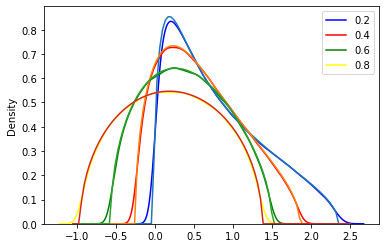

In [34]:
sns.kdeplot(data=E_r1,color='blue',label='0.2')
sns.kdeplot(data=E_r2,color='red',label='0.4')
sns.kdeplot(data=E_r3,color='green',label='0.6')
sns.kdeplot(data=E_r4,color='yellow',label='0.8')
sns.lineplot(Z, fx1)
sns.lineplot(Z, fx2)
sns.lineplot(Z, fx3)
sns.lineplot(Z, fx4)
#sns.lineplot(Z, fx5,color='black',label='Semi-Circulo')
#sns.lineplot(Z, fx6,color='black',label='MP')
plt.legend()
plt.show()

# Ejercicio 5

* Wishart Inversa

In [35]:
r = 1/2
x_plus = 2*r+ 1.0+ np.sqrt(2*(r+1))
x_minus = 2*r+1.0-np.sqrt(2*(r+1))
x = np.linspace(x_minus,x_plus, num = 100, endpoint = True)
rho1 = np.sqrt((x_plus-x)*(x-x_minus))/(2*np.pi*r*x**2)

* Wishart normal

In [36]:
q = 1/2
y_plus = (1+(q)**(-1/2))**2
y_minus = (1-(q)**(-1/2))**2
y = np.linspace(y_minus,y_plus, num = 100, endpoint = True)
rho2 = np.sqrt((y-y_minus)*(y_plus-y))/(2*np.pi*y*q)

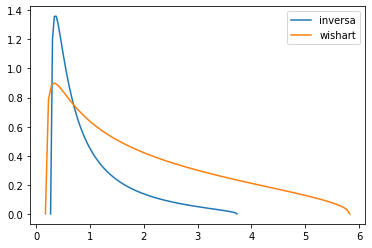

In [38]:
plt.plot(x,rho1,label='inversa')
plt.plot(y,rho2,label='wishart')
plt.legend()
plt.show()

## Ejercicio 6

In [40]:
#### PARAMETROS
b=1.5
q=0.17

G_im=[]
G_real=[]
Z = list(np.linspace(min(E),max(E),100))
for i in range(Npts):
    imag=np.array([10e-20,10e-20,10e-20,10e-20])
    z=x[i]
    '''SOLUCION SIMBOLICA'''
    t = symbols('t') # Simbolos
    Solve = solve(q*2*t**4+2*q(q-b*z)*t**3+(z2-2*b*q*z+q2-1)*t**2-2*t-1,t) # Ecuación
    
    solution=np.array(Solve)
    n=solution.shape[0]
    for j in range (n):
        imag[j]=im(Solve[j])
        
    G_im.append(max(imag[0],imag[1],imag[2],imag[3]))

    
G_imaginarios=np.array(G_im)
res_2=G_imaginarios*(1/(np.pi*2*x))

NameError: ignored

In [ ]:
!jupyter nbconvert --to html T5_TSE.ipynb